In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import math


# General overview of Data

In [2]:
df=pd.read_pickle("combined_outer_data.pkl")

In [3]:
df=df.sort_values("date")
df

,time/date,event,date,time,E-Today(KWH),months,days,years,week,DayOfWeek,IsWeekend,Quarter
0,NaT,NaN,2024-11-16,NaN,8.0,November,Saturday,2024.0,46,5.0,True,4.0
1,NaT,NaN,2024-11-17,NaN,40.0,November,Sunday,2024.0,46,6.0,True,4.0
2,NaT,NaN,2024-11-18,NaN,39.0,November,Monday,2024.0,47,0.0,False,4.0
3,2024-11-19 17:35:06,A1-Grid under voltage,2024-11-19,17:35:06,39.0,November,Tuesday,2024.0,47,1.0,False,4.0
4,2024-11-19 17:35:06,A2-Grid absent,2024-11-19,17:35:06,39.0,November,Tuesday,2024.0,47,1.0,False,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1438,2025-09-07 06:46:46,A0-Grid over voltage,2025-09-07,06:46:46,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
1441,2025-09-11 10:13:39,A0-Grid over voltage,2025-09-11,10:13:39,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
1439,2025-09-11 12:07:02,A0-Grid over voltage,2025-09-11,12:07:02,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
1440,2025-09-11 12:02:16,A0-Grid over voltage,2025-09-11,12:02:16,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1443 entries, 0 to 1442
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time/date     1281 non-null   datetime64[ns]
 1   event         1281 non-null   object        
 2   date          1443 non-null   datetime64[ns]
 3   time          1281 non-null   object        
 4   E-Today(KWH)  1309 non-null   float64       
 5   months        1309 non-null   object        
 6   days          1309 non-null   object        
 7   years         1309 non-null   float64       
 8   week          1309 non-null   UInt32        
 9   DayOfWeek     1309 non-null   float64       
 10  IsWeekend     1309 non-null   object        
 11  Quarter       1309 non-null   float64       
dtypes: UInt32(1), datetime64[ns](2), float64(4), object(5)
memory usage: 142.3+ KB


In [5]:
df.describe()

,time/date,date,E-Today(KWH),years,week,DayOfWeek,Quarter
count,1281,1443,1309.000000,1309.000000,1309.0,1309.000000,1309.000000
mean,2025-05-09 05:07:28.307571968,2025-05-04 06:04:14.469854464,34.720397,2024.925898,20.34301,2.932009,1.974790
min,2024-11-19 17:35:06,2024-11-16 00:00:00,1.000000,2024.000000,1.0,0.000000,1.000000
25%,2025-03-07 16:25:06,2025-03-04 00:00:00,25.000000,2025.000000,11.0,1.000000,1.000000
50%,2025-05-09 11:24:04,2025-05-01 00:00:00,35.000000,2025.000000,19.0,3.000000,2.000000
75%,2025-07-18 07:57:13,2025-07-17 00:00:00,48.000000,2025.000000,29.0,5.000000,3.000000
max,2025-09-11 12:07:02,2025-09-11 00:00:00,62.000000,2025.000000,52.0,6.000000,4.000000
std,NaN,NaN,14.107323,0.262038,12.089656,1.949466,0.949878


In [6]:
df["date"].unique()

<DatetimeArray>
['2024-11-16 00:00:00', '2024-11-17 00:00:00', '2024-11-18 00:00:00',
 '2024-11-19 00:00:00', '2024-11-20 00:00:00', '2024-11-21 00:00:00',
 '2024-11-22 00:00:00', '2024-11-23 00:00:00', '2024-11-24 00:00:00',
 '2024-11-25 00:00:00',
 ...
 '2025-08-27 00:00:00', '2025-08-30 00:00:00', '2025-08-31 00:00:00',
 '2025-09-02 00:00:00', '2025-09-03 00:00:00', '2025-09-04 00:00:00',
 '2025-09-05 00:00:00', '2025-09-06 00:00:00', '2025-09-07 00:00:00',
 '2025-09-11 00:00:00']
Length: 294, dtype: datetime64[ns]

## Feature Extraction

In [7]:
def get_season(month):
    if month in ["December", "January", "February"]:
        return "Winter"
    elif month in ["March", "April", "May"]:
        return "Spring"
    elif month in ["June", "July", "August"]:
        return "Summer"
    else:
        return "Autumn"

df['Season'] = df['months'].apply(get_season)
df

,time/date,event,date,time,E-Today(KWH),months,days,years,week,DayOfWeek,IsWeekend,Quarter,Season
0,NaT,NaN,2024-11-16,NaN,8.0,November,Saturday,2024.0,46,5.0,True,4.0,Autumn
1,NaT,NaN,2024-11-17,NaN,40.0,November,Sunday,2024.0,46,6.0,True,4.0,Autumn
2,NaT,NaN,2024-11-18,NaN,39.0,November,Monday,2024.0,47,0.0,False,4.0,Autumn
3,2024-11-19 17:35:06,A1-Grid under voltage,2024-11-19,17:35:06,39.0,November,Tuesday,2024.0,47,1.0,False,4.0,Autumn
4,2024-11-19 17:35:06,A2-Grid absent,2024-11-19,17:35:06,39.0,November,Tuesday,2024.0,47,1.0,False,4.0,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,2025-09-07 06:46:46,A0-Grid over voltage,2025-09-07,06:46:46,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,Autumn
1441,2025-09-11 10:13:39,A0-Grid over voltage,2025-09-11,10:13:39,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,Autumn
1439,2025-09-11 12:07:02,A0-Grid over voltage,2025-09-11,12:07:02,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,Autumn
1440,2025-09-11 12:02:16,A0-Grid over voltage,2025-09-11,12:02:16,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,Autumn


# Missing valuee treatment

In [8]:
df.isnull().sum()

time/date       162
event           162
date              0
time            162
E-Today(KWH)    134
months          134
days            134
years           134
week            134
DayOfWeek       134
IsWeekend       134
Quarter         134
Season            0
dtype: int64

In [9]:
df["event"].fillna("no fault",inplace=True)

In [10]:
df["months"]=df["date"].dt.month_name()
df["days"]=df["date"].dt.day_name()
df["years"]=df["date"].dt.year
df["week"]=df["date"].dt.isocalendar().week
df["DayOfWeek"]=df["date"].dt.weekday
df['IsWeekend'] = df["date"].dt.weekday >= 5
df['Quarter'] = df["date"].dt.quarter

## E-Today(KWH) Missing values 

In [11]:
df[df["E-Today(KWH)"].isna()]["date"].unique()

<DatetimeArray>
['2025-08-27 00:00:00', '2025-08-30 00:00:00', '2025-08-31 00:00:00',
 '2025-09-02 00:00:00', '2025-09-03 00:00:00', '2025-09-04 00:00:00',
 '2025-09-05 00:00:00', '2025-09-06 00:00:00', '2025-09-07 00:00:00',
 '2025-09-11 00:00:00']
Length: 10, dtype: datetime64[ns]

In [12]:
df.set_index("date",inplace=True)

In [13]:
df.isnull().sum()[3]/df.shape[0]

np.float64(0.09286209286209286)

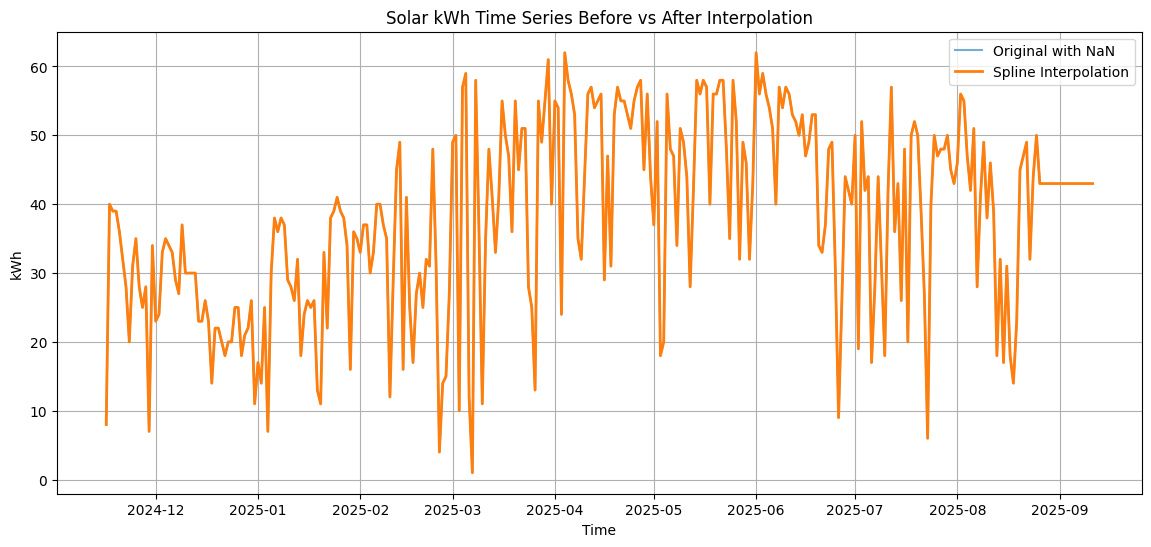

In [14]:

plt.figure(figsize=(14,6))

plt.plot(df["E-Today(KWH)"], label="Original with NaN", alpha=0.6)
plt.plot(df["E-Today(KWH)"].interpolate(method="spline", order=3).ffill().bfill(),
         label="Spline Interpolation", linewidth=2)

plt.legend()
plt.title("Solar kWh Time Series Before vs After Interpolation")
plt.xlabel("Time")
plt.ylabel("kWh")
plt.grid()
plt.show()

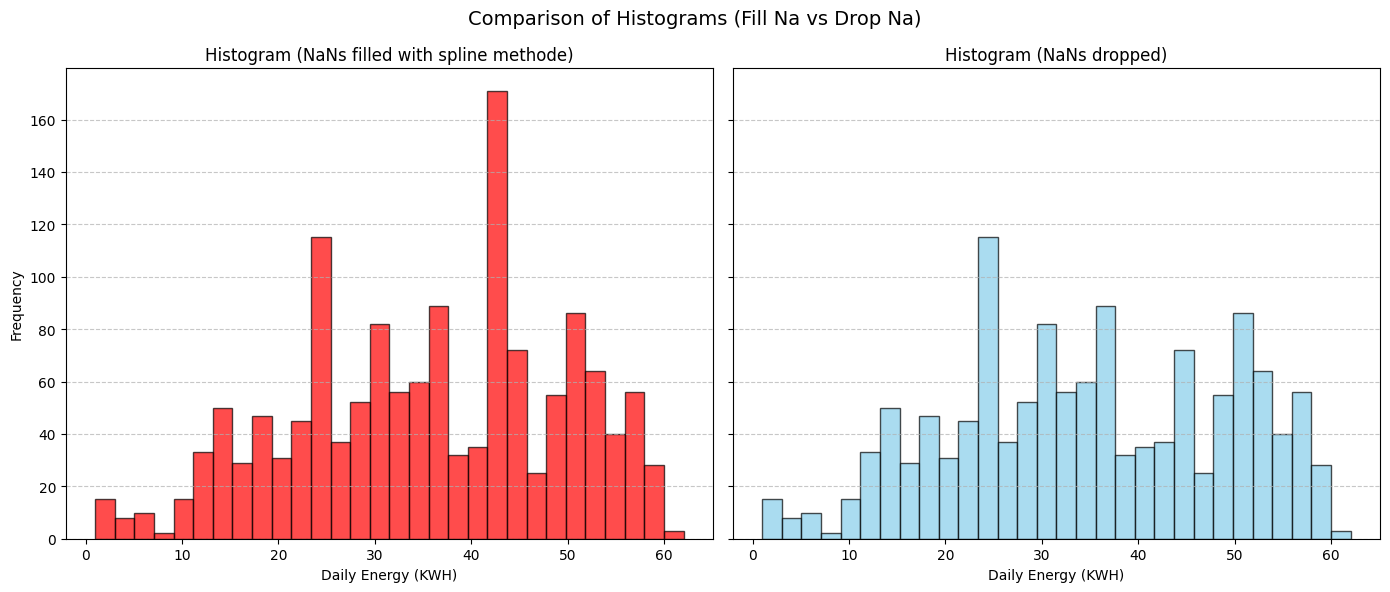

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# Histogram with NaNs filled (using backfill here)
axes[0].hist(df["E-Today(KWH)"].interpolate(method="spline", order=2).ffill().bfill(), 
             bins=30, color="red", edgecolor="black", alpha=0.7)
axes[0].set_title("Histogram (NaNs filled with spline methode)")
axes[0].set_xlabel("Daily Energy (KWH)")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Histogram with NaNs dropped
axes[1].hist(df["E-Today(KWH)"].dropna(), 
             bins=30, color="skyblue", edgecolor="black", alpha=0.7)
axes[1].set_title("Histogram (NaNs dropped)")
axes[1].set_xlabel("Daily Energy (KWH)")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

plt.suptitle("Comparison of Histograms (Fill Na vs Drop Na)", fontsize=14)
plt.tight_layout()
plt.show()

### After inspection of  missing values

In [16]:
df["E-Today(KWH)"]=df["E-Today(KWH)"].interpolate(method="spline", order=2).ffill().bfill()


In [17]:
df.isnull().sum()

time/date       162
event             0
time            162
E-Today(KWH)      0
months            0
days              0
years             0
week              0
DayOfWeek         0
IsWeekend         0
Quarter           0
Season            0
dtype: int64

#  The "Hypothesis/Question-Driven Exploration" stage

## Q1)Does the grid fault lower kwh production

In [18]:
df.reset_index(inplace=True)

In [19]:
# Count faults per day
faults_per_day = df.groupby("date")["event"].apply(lambda x: (x != "no fault").sum())

# Daily kWh
kwh_per_day = df.groupby("date")["E-Today(KWH)"].mean()

# Combine into one DataFrame
daily_summary = pd.DataFrame({
    "fault_count": faults_per_day,
    "kwh": kwh_per_day
})
daily_summary


,fault_count,kwh
date,,
2024-11-16,0,8.0
2024-11-17,0,40.0
2024-11-18,0,39.0
2024-11-19,6,39.0
2024-11-20,0,36.0
...,...,...
2025-09-04,2,43.0
2025-09-05,2,43.0
2025-09-06,6,43.0


In [20]:
corr = daily_summary["fault_count"].corr(daily_summary["kwh"])
print("Correlation between fault count and kWh:", corr)


Correlation between fault count and kWh: -0.10339981835153983


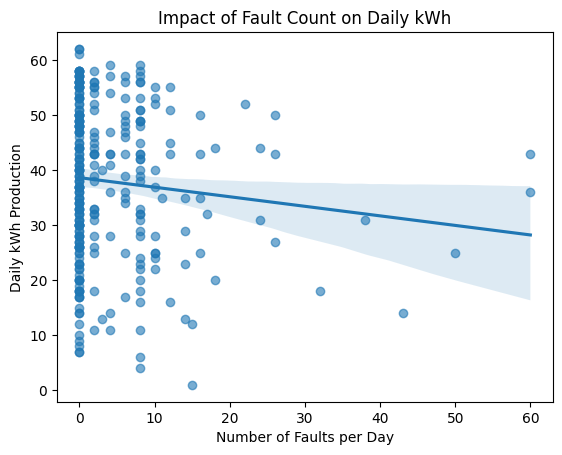

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="fault_count", y="kwh", data=daily_summary, scatter_kws={"alpha":0.6})
plt.title("Impact of Fault Count on Daily kWh")
plt.xlabel("Number of Faults per Day")
plt.ylabel("Daily kWh Production")
plt.show()


### the above information proof that grid fault is negative correlated to kwh

## Q2) Which months show the highest average energy production?

In [22]:
df.groupby("months").agg({"E-Today(KWH)":"mean"}).sort_values(by="E-Today(KWH)",ascending=False)

,E-Today(KWH)
months,
April,46.355140
June,46.279221
September,43.000000
May,41.031646
July,37.913793
August,33.559184
March,32.354962
November,27.846154
February,27.333333



## Q2. Is energy production increasing or decreasing over the year 2024–2025?

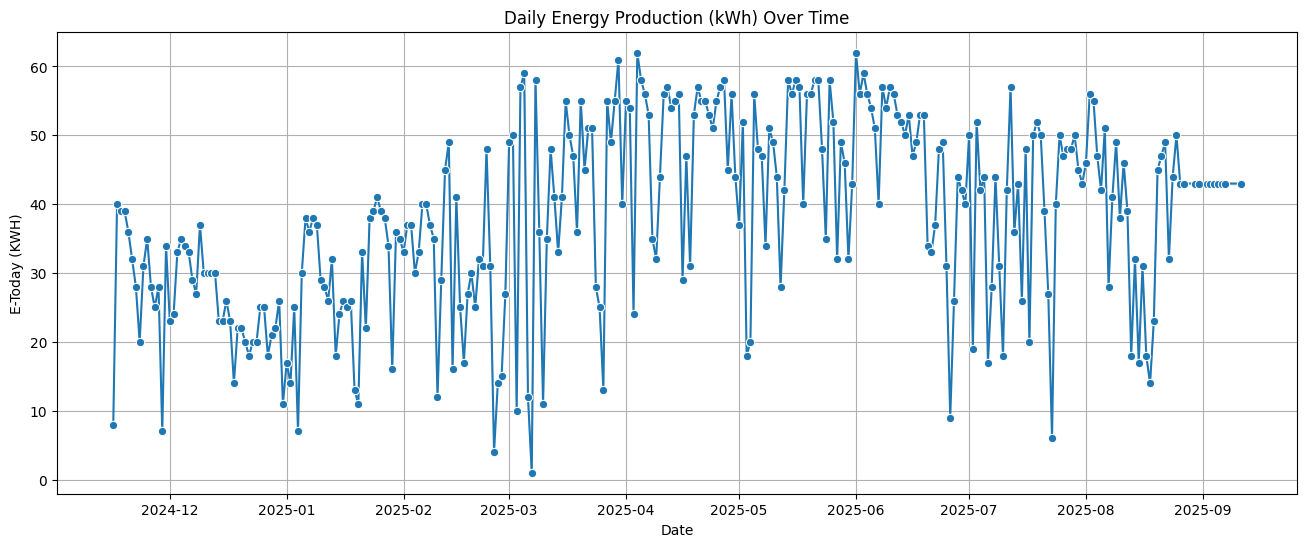

In [23]:
plt.figure(figsize=(16,6))
sns.lineplot(x='date', y='E-Today(KWH)', data=df, marker='o')
plt.title('Daily Energy Production (kWh) Over Time')
plt.xlabel('Date')
plt.ylabel('E-Today (KWH)')
plt.grid(True)
plt.show()

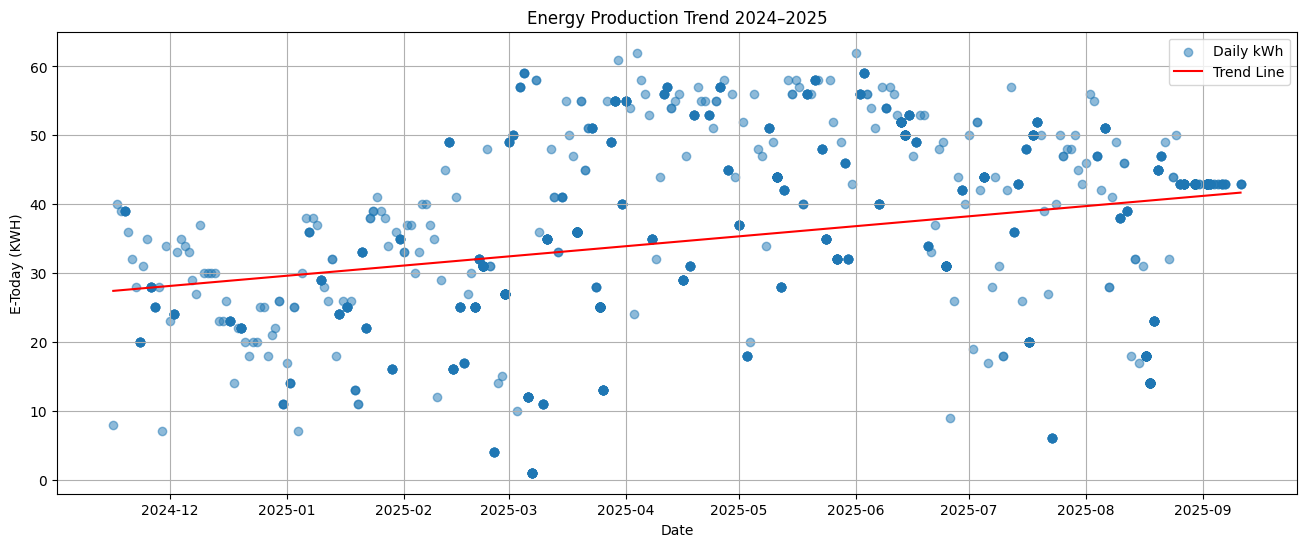

Slope of trend line: 0.047725851543226665


In [24]:
from sklearn.linear_model import LinearRegression
import numpy as np


df['date_ordinal'] = df['date'].map(pd.Timestamp.toordinal)

X = df['date_ordinal'].values.reshape(-1,1)
y = df['E-Today(KWH)'].values

model = LinearRegression()
model.fit(X, y)

# Predicted trend
y_pred = model.predict(X)

plt.figure(figsize=(16,6))
plt.scatter(df['date'], y, alpha=0.5, label='Daily kWh')
plt.plot(df['date'], y_pred, color='red', label='Trend Line')
plt.title('Energy Production Trend 2024–2025')
plt.xlabel('Date')
plt.ylabel('E-Today (KWH)')
plt.legend()
plt.grid(True)
plt.show()

print("Slope of trend line:", model.coef_[0])


## Q3. Which days of the week show the highest average kWh production?

In [25]:
df.groupby("days").agg({"E-Today(KWH)":"mean"}).sort_values(by="E-Today(KWH)",ascending=False)

,E-Today(KWH)
days,
Saturday,41.626374
Sunday,36.634615
Wednesday,34.956693
Friday,34.516279
Tuesday,34.464844
Thursday,31.813953
Monday,30.656250


## Q4. Do weekends produce more or less energy compared to weekdays?

   IsWeekend  E-Today(KWH)
0      False     33.660750
1       True     39.811189


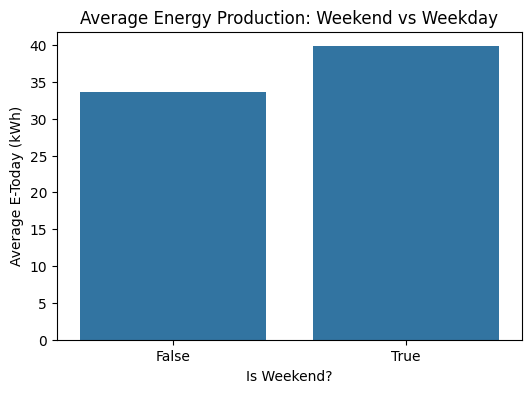

In [26]:
weekend_avg = df.groupby('IsWeekend')['E-Today(KWH)'].mean().reset_index()

print(weekend_avg)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='IsWeekend', y='E-Today(KWH)', data=weekend_avg)
plt.title('Average Energy Production: Weekend vs Weekday')
plt.xlabel('Is Weekend?')
plt.ylabel('Average E-Today (kWh)')
plt.show()

## Q5. How does energy production vary across quarters (Q1–Q4)?


In [27]:
quarter_avg = df.groupby('Quarter')['E-Today(KWH)'].agg(['mean','std',"sum"]).reset_index()
print(quarter_avg)



   Quarter       mean        std      sum
0        1  29.739216  12.864132  15167.0
1        2  44.319809  10.672052  18570.0
2        3  36.038369  13.173891  15028.0
3        4  25.216495   7.006287   2446.0


## Q6. Is there a seasonal trend in power generation (summer vs winter)?


   Season  E-Today(KWH)
0  Autumn     39.583815
1  Spring     37.798861
2  Summer     37.512586
3  Winter     26.307190


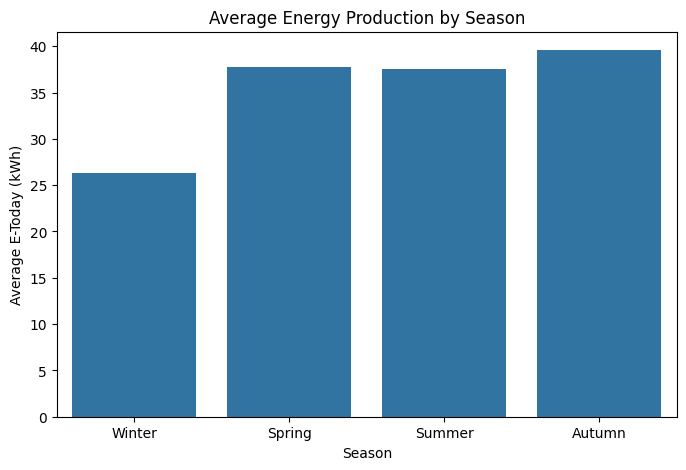

In [28]:
season_avg = df.groupby('Season')['E-Today(KWH)'].mean().reset_index()
print(season_avg)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Season', y='E-Today(KWH)', data=season_avg, order=['Winter','Spring','Summer','Autumn'])
plt.title('Average Energy Production by Season')
plt.xlabel('Season')
plt.ylabel('Average E-Today (kWh)')
plt.show()

## Q7. Which specific dates show unusually high or low E-Today values?


In [29]:
mean_kwh = df['E-Today(KWH)'].mean()
std_kwh = df['E-Today(KWH)'].std()

# Define thresholds
high_threshold = mean_kwh + 2*std_kwh
low_threshold = mean_kwh - 2*std_kwh

# Find outlier dates
high_energy_dates = df[df['E-Today(KWH)'] > high_threshold]['date']
low_energy_dates = df[df['E-Today(KWH)'] < low_threshold]['date']

print("High energy production dates:\n", high_energy_dates)
print("\nLow energy production dates:\n", low_energy_dates)

High energy production dates:
 Series([], Name: date, dtype: datetime64[ns])

Low energy production dates:
 0      2024-11-16
37     2024-11-29
104    2025-01-04
309    2025-02-25
310    2025-02-25
311    2025-02-25
312    2025-02-25
313    2025-02-25
314    2025-02-25
315    2025-02-25
316    2025-02-25
381    2025-03-07
382    2025-03-07
383    2025-03-07
384    2025-03-07
385    2025-03-07
386    2025-03-07
387    2025-03-07
388    2025-03-07
389    2025-03-07
390    2025-03-07
391    2025-03-07
392    2025-03-07
393    2025-03-07
394    2025-03-07
395    2025-03-07
1125   2025-07-23
1126   2025-07-23
1127   2025-07-23
1128   2025-07-23
1129   2025-07-23
1130   2025-07-23
1131   2025-07-23
1132   2025-07-23
Name: date, dtype: datetime64[ns]


## Q8. Which fault types (A0, A1, A2…) occur most commonly?

event
A0-Grid over voltage       411
A2-Grid absent             265
A1-Grid under voltage      242
A4-Grid under frequency    226
A3-Grid over frequency     124
A6-Grid abnormal            13
Name: count, dtype: int64


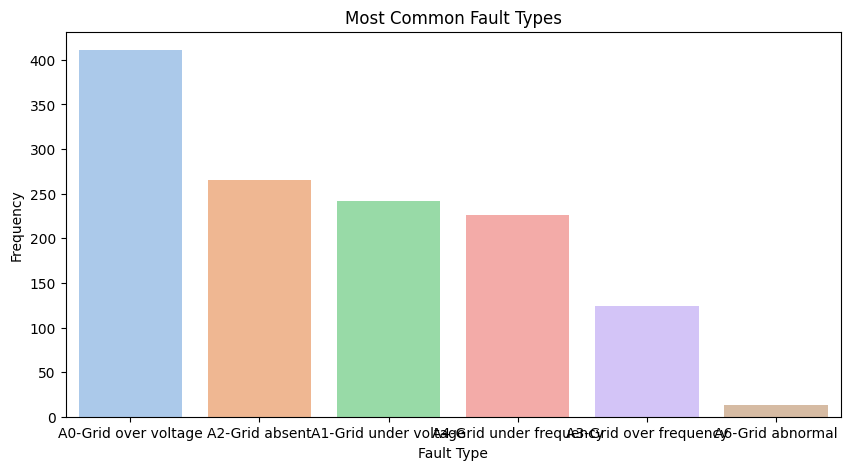

In [30]:
# Exclude 'no fault'
fault_counts = df[df['event'] != 'no fault']['event'].value_counts()
print(fault_counts)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=fault_counts.index, y=fault_counts.values, palette='pastel')
plt.title('Most Common Fault Types')
plt.xlabel('Fault Type')
plt.ylabel('Frequency')
plt.show()


## Q9. Which faults are associated with the largest drops in E-Today output?


event
A6-Grid abnormal           11.538462
A2-Grid absent             34.328302
A4-Grid under frequency    35.265487
A0-Grid over voltage       35.289538
A1-Grid under voltage      35.892562
A3-Grid over frequency     37.129032
Name: E-Today(KWH), dtype: float64


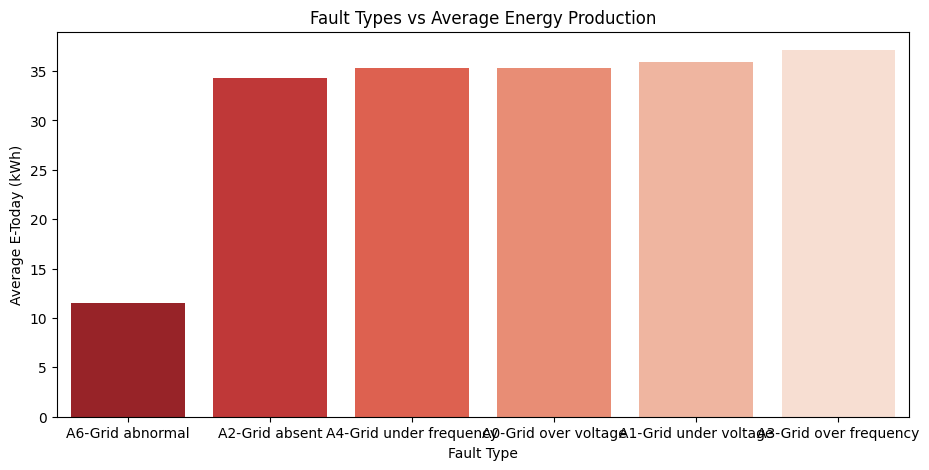

In [31]:
fault_energy = df[df['event'] != 'no fault'].groupby('event')['E-Today(KWH)'].mean().sort_values()
print(fault_energy)

# Plot
plt.figure(figsize=(11,5))
sns.barplot(x=fault_energy.index, y=fault_energy.values, palette='Reds_r')
plt.title('Fault Types vs Average Energy Production')
plt.xlabel('Fault Type')
plt.ylabel('Average E-Today (kWh)')
plt.show()

## Q10. How often do faults occur on days with low energy generation (<20 kWh)?


In [32]:
low_energy_days = df[df['E-Today(KWH)'] < 20]
low_energy_faults = low_energy_days[low_energy_days['event'] != 'no fault']
print("Faults on low-energy days:", low_energy_faults.shape[0])

# Percentage
percentage = (low_energy_faults.shape[0] / low_energy_days.shape[0]) * 100
print(f"Percentage of low-energy days with faults: {percentage:.2f}%")

Faults on low-energy days: 192
Percentage of low-energy days with faults: 91.87%


## Q11. Are certain months more prone to grid-related faults (over-voltage, under-voltage, grid-absent)?


           event
months          
March        262
August       245
May          158
June         154
February     153
July         116
April        107
January       95
December      58
September     56
November      39


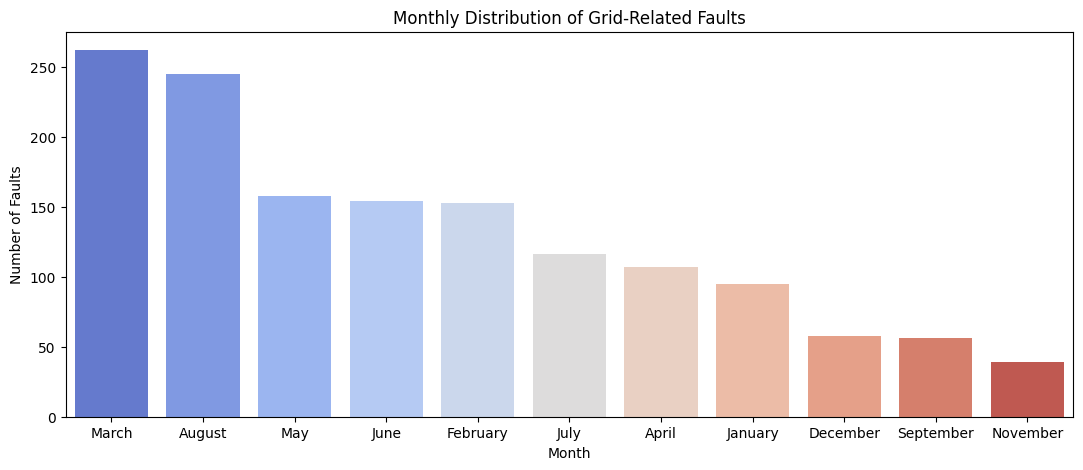

In [33]:
grid_faults = df[df['event']!="no event"]

monthly_faults = grid_faults.groupby('months').agg({"event":"count"}).sort_values(ascending=False,by="event")
print(monthly_faults)

# Plot
plt.figure(figsize=(13,5))
sns.barplot(x=monthly_faults.index, y=monthly_faults["event"], palette='coolwarm')
plt.title('Monthly Distribution of Grid-Related Faults')
plt.xlabel('Month')
plt.ylabel('Number of Faults')
plt.show()

## Q14. Is there a time-lag effect—does energy remain low for a few days after a fault event?

In [34]:
grid_faults = ['A0-Grid over voltage', 'A1-Grid under voltage', 'A2-Grid absent']
df['GridFaultFlag'] = df['event'].apply(lambda x: 1 if x in grid_faults else 0)


# Shift the grid fault flag to create lag features
df['FaultYesterday'] = df['GridFaultFlag'].shift(1)
df['Fault2DaysAgo'] = df['GridFaultFlag'].shift(2)
df['Fault3DaysAgo'] = df['GridFaultFlag'].shift(3)

# Calculate average energy after fault
avg_energy_after_1day = df[df['FaultYesterday'] == 1]['E-Today(KWH)'].mean()
avg_energy_after_2days = df[df['Fault2DaysAgo'] == 1]['E-Today(KWH)'].mean()
avg_energy_after_3days = df[df['Fault3DaysAgo'] == 1]['E-Today(KWH)'].mean()

# Energy on days with no previous fault
avg_energy_no_fault = df[(df['FaultYesterday'] == 0) & (df['Fault2DaysAgo'] == 0) & (df['Fault3DaysAgo'] == 0)]['E-Today(KWH)'].mean()

print("Average energy 1 day after fault:", avg_energy_after_1day)
print("Average energy 2 days after fault:", avg_energy_after_2days)
print("Average energy 3 days after fault:", avg_energy_after_3days)
print("Average energy on days with no prior faults:", avg_energy_no_fault)

Average energy 1 day after fault: 35.23664122137404
Average energy 2 days after fault: 35.2117903930131
Average energy 3 days after fault: 35.35956284153006
Average energy on days with no prior faults: 36.12280701754386


## Q15. Which weeks of the year have the highest average energy production?


In [35]:
# top 5 week 
df.groupby(["years","week"]).agg({"E-Today(KWH)":"mean"}).reset_index().sort_values(by=["years","E-Today(KWH)"],ascending=[True,False]).drop_duplicates(subset="years",keep="first")

,years,week,E-Today(KWH)
2,2024,47,29.473684
24,2025,17,55.150000


## Q16. Do certain months show more variability (higher standard deviation) in production?


In [39]:
df.groupby(["years","months"]).agg({"E-Today(KWH)":"std"}).sort_values(by="E-Today(KWH)",ascending=False)


E-Today(KWH)
years months                 
2025  March         15.275000
      July          14.329398
      August        13.421965
      April         11.195731
      May           10.573625
      June           9.574269
      February       9.394147
2024  November       8.225565
2025  January        8.110146
2024  December       5.445656
2025  September      0.000000

In [37]:





🔶 C. Time-Series and Calendar Effects
## Q18. Do consecutive cloudy days (low E-Today) relate to more fault events?
## Q19. Does energy production differ significantly between seasons?
## Q20. Are mornings or evenings more prone to system faults?

🔶 D. Combined Event + Time Questions
## Q21. Do faults occur more frequently on high-production or low-production days?
## Q22. Is the probability of a fault higher during specific months (e.g., summer heat)?
## Q23. How does the distribution of faults differ between weekdays and weekends?
## Q24. What is the average kWh produced on a day with a fault vs. a no-fault day?
## Q25. Which quarter experiences the highest fault density?
🔶 E. Advanced ML-Style Questions
## Q26. Can we predict tomorrow’s E-Today based on past energy and fault history?
## Q27. Can a classification model predict whether a fault will occur tomorrow?
## Q28. Which features (month, day, time, event type, week number) are most important for fault prediction?
## Q29. Can clustering help identify “energy behavior patterns” across the year?
## Q30. Does adding fault indicators improve forecasting accuracy in a time-series model?

SyntaxError: invalid character '🔶' (U+1F536) (3837855287.py, line 1)

## Events

In [ ]:
df["event"].value_counts()

In [ ]:
# Get counts
event_counts = df["event"].value_counts().reset_index()
event_counts.columns = ["event", "count"]


plt.bar(event_counts["event"], event_counts["count"])
plt.xlabel("Event")
plt.ylabel("Count")
plt.title("Event Frequency")
plt.xticks(rotation=60) 
plt.show()

In [ ]:
# Get counts
grouped =df.groupby(["days","event"]).size().reset_index(name="fault_count")
days = grouped["days"].unique()
day = len(days)

# number of rows/columns in grid
cols = 2
rows = math.ceil(day / cols)

plt.figure(figsize=(18, rows * 4))

for i, days in enumerate(days, 1):
    event_df = grouped[grouped["days"] == days]

    plt.subplot(rows, cols, i)
    plt.bar(event_df["event"].astype(str), event_df["fault_count"])
    plt.title(days)
    plt.xlabel("event")
    plt.ylabel("Fault Count")
    plt.xticks(rotation=90)
    plt.grid(True, linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()


In [ ]:
# Aggregate monthly energy
monthly_energy = df.groupby("months").agg({"E-Today(KWH)": "sum"})

# Bar plot (best for discrete months)
plt.figure(figsize=(10,6))
plt.bar(monthly_energy.index, monthly_energy["E-Today(KWH)"], color="skyblue", edgecolor="black")
plt.xlabel("Months")
plt.ylabel("Total Energy (KWH)")
plt.title("Monthly Energy Production")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:

monthly_energy = df.groupby("days").agg({"E-Today(KWH)": "sum"})


plt.figure(figsize=(10,6))
plt.bar(monthly_energy.index, monthly_energy["E-Today(KWH)"], color="skyblue", edgecolor="black")
plt.xlabel("Days")
plt.ylabel("Total Energy (KWH)")
plt.title("Weekly Energy Production")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.boxplot(df["E-Today(KWH)"])
plt.title("Outlier Detection in Daily Energy (KWH)")
plt.ylabel("E-Today(KWH)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()